In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,f1_score

# Reading data from dataset

In [2]:
df = pd.read_csv('/kaggle/input/iriscsv/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# Univariate analysis

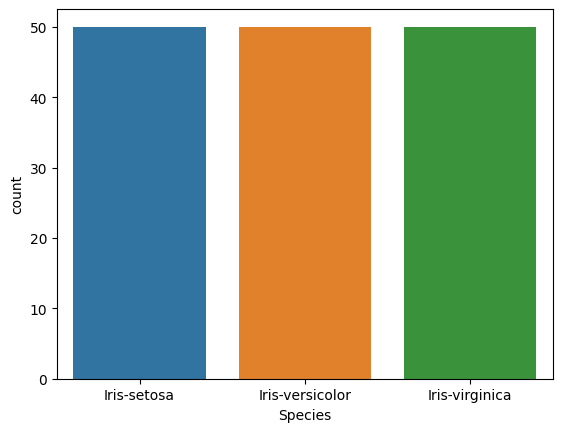

In [5]:
sns.countplot(x = 'Species',data = df)
plt.show()

In [6]:
mean_species_sepallength = df.groupby(['Species'],as_index = False)['SepalLengthCm'].mean()
mean_species_sepallength

,Species,SepalLengthCm
0,Iris-setosa,5.006
1,Iris-versicolor,5.936
2,Iris-virginica,6.588


Text(0, 0.5, 'SepalLengthCm')

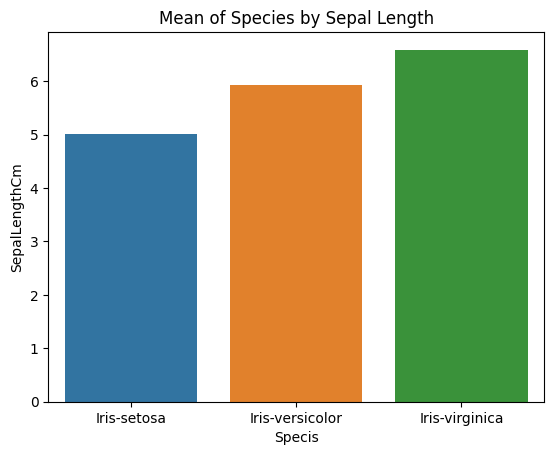

In [7]:
sns.barplot(x = 'Species',y= 'SepalLengthCm',data = mean_species_sepallength )
plt.title('Mean of Species by Sepal Length')
plt.xlabel('Specis')
plt.ylabel('SepalLengthCm')

In [8]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [9]:
mean_species_sepalwidth=df.groupby(['Species'],as_index = False)['SepalWidthCm'].mean()
mean_species_sepalwidth

,Species,SepalWidthCm
0,Iris-setosa,3.418
1,Iris-versicolor,2.770
2,Iris-virginica,2.974


Text(0, 0.5, 'SepalwidththCm')

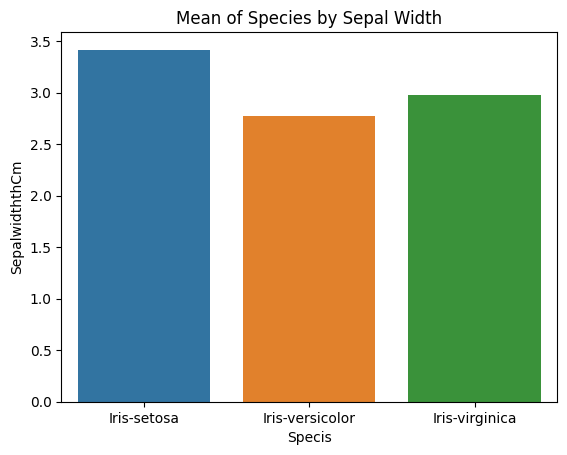

In [10]:
sns.barplot(x = 'Species',y = 'SepalWidthCm',data = mean_species_sepalwidth)
plt.title('Mean of Species by Sepal Width')
plt.xlabel('Specis')
plt.ylabel('SepalwidththCm')

In [11]:
mean_species_petallength=df.groupby(['Species'],as_index = False)['PetalLengthCm'].mean()
mean_species_petallength

,Species,PetalLengthCm
0,Iris-setosa,1.464
1,Iris-versicolor,4.260
2,Iris-virginica,5.552


Text(0, 0.5, 'PetalLengthCm')

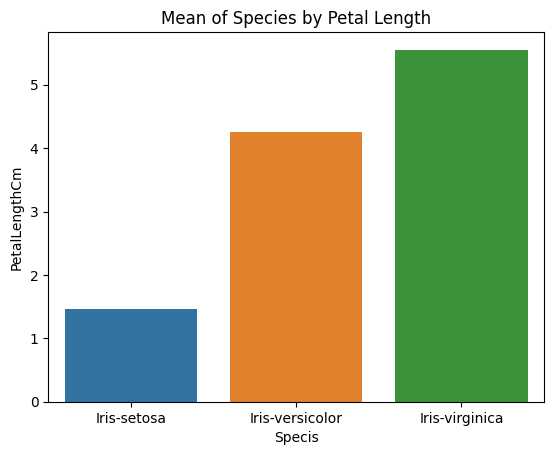

In [12]:
sns.barplot(x = 'Species',y = 'PetalLengthCm',data =mean_species_petallength)
plt.title('Mean of Species by Petal Length')
plt.xlabel('Specis')
plt.ylabel('PetalLengthCm')

In [13]:
mean_species_petalwidth=df.groupby(['Species'],as_index = False)['PetalWidthCm'].mean()
mean_species_petalwidth

,Species,PetalWidthCm
0,Iris-setosa,0.244
1,Iris-versicolor,1.326
2,Iris-virginica,2.026


Text(0, 0.5, 'PetalWidthCm')

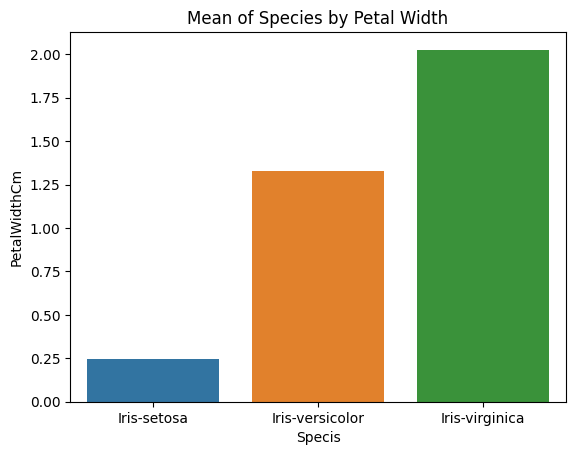

In [14]:
sns.barplot(x = 'Species',y = 'PetalWidthCm',data =mean_species_petalwidth)
plt.title('Mean of Species by Petal Width')
plt.xlabel('Specis')
plt.ylabel('PetalWidthCm')

Text(0, 0.5, 'Sepal Width (cm)')

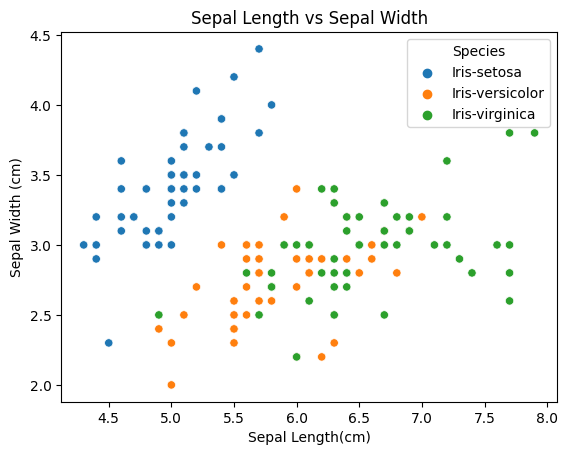

In [15]:
sns.scatterplot(x = 'SepalLengthCm',y = 'SepalWidthCm',hue = 'Species',data=df)
plt.title('Sepal Length vs Sepal Width')
plt.xlabel('Sepal Length(cm)')
plt.ylabel('Sepal Width (cm)')

Text(0, 0.5, 'petal Width (cm)')

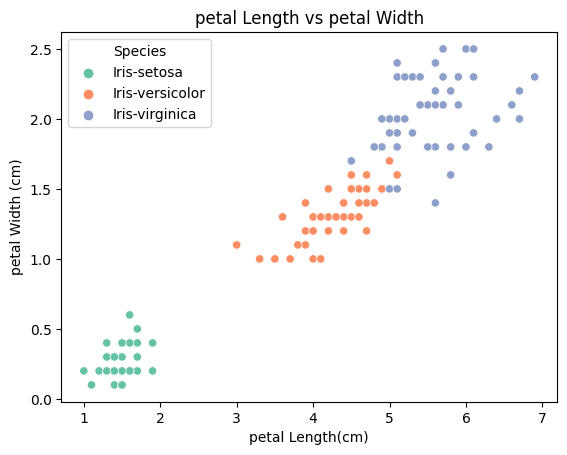

In [16]:
sns.scatterplot(x = 'PetalLengthCm',y = 'PetalWidthCm',hue = 'Species',data=df,palette = 'Set2')
plt.title('petal Length vs petal Width')
plt.xlabel('petal Length(cm)')
plt.ylabel('petal Width (cm)')

In [17]:
df = df.drop(columns = ['Id'],axis = 1)

In [18]:
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

# Encoding the categorical column

In [19]:
encoder = LabelEncoder()

In [20]:
df['Encoder_species'] = encoder.fit_transform(df['Species'])

In [21]:
df['Encoder_species'].value_counts()

Encoder_species
0    50
1    50
2    50
Name: count, dtype: int64

In [22]:
df = df.drop(columns = ['Species'],axis = 1)

In [23]:
y = df['Encoder_species']
X = df.drop(columns = ['Encoder_species'],axis = 1)

# splitting the data into train and test data

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state = 42,test_size =0.2)

In [25]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


# Model building

In [26]:
models = {
    "Logistic Regression":LogisticRegression(),
    "Decision Trees": DecisionTreeClassifier()
}

In [27]:
for name,model in models.items():
    model.fit(X_train,y_train)
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train,y_train_pred)
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test_pred,y_test)
    train_f1 = f1_score(y_train,y_train_pred,average ='weighted')
    test_f1 = f1_score(y_train,y_train_pred,average = 'weighted')
    precision_train = precision_score(y_train,y_train_pred,average = 'weighted')
    precision_test = precision_score(y_test,y_test_pred,average = 'weighted')
    confusion_matrix_train = confusion_matrix(y_train,y_train_pred)
    confusion_matrix_test = confusion_matrix(y_test,y_test_pred)
    print(f"model : {name}")
    print(f"Training accuracy is : {train_accuracy} \n")
    print(f"Test accuracy is :  {test_accuracy} \n")
    print(f"f1 score of train data is :  {train_f1} \n")
    print(f"f1 score of test data  is :  {test_f1} \n")
    print(f"Train precision is : {precision_train} \n")
    print(f"Test precision is : {precision_test} \n")
    print(f"The confusion matrix of training data is : \n {confusion_matrix_train} \n")
    print(f"The confusion matrix of test data is : \n {confusion_matrix_test} \n")
    print("\n")

model : Logistic Regression
Training accuracy is : 0.975 

Test accuracy is :  1.0 

f1 score of train data is :  0.9749882794186592 

f1 score of test data  is :  0.9749882794186592 

Train precision is : 0.9767857142857144 

Test precision is : 1.0 

The confusion matrix of training data is : 
 [[40  0  0]
 [ 0 38  3]
 [ 0  0 39]] 

The confusion matrix of test data is : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



model : Decision Trees
Training accuracy is : 1.0 

Test accuracy is :  1.0 

f1 score of train data is :  1.0 

f1 score of test data  is :  1.0 

Train precision is : 1.0 

Test precision is : 1.0 

The confusion matrix of training data is : 
 [[40  0  0]
 [ 0 41  0]
 [ 0  0 39]] 

The confusion matrix of test data is : 
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]] 



